In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import string 
punct = string.punctuation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,recall_score,precision_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score


In [2]:
#read data 
data_train = pd.read_csv("nlp/train.csv",index_col='id')
data_test = pd.read_csv("nlp/test.csv")


print(data_train.shape)
print(data_test.shape)
#print(data_test.head())
data_train.head()

(7613, 4)
(3263, 4)


,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#describe data 
data_train.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


In [5]:
data_train["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [6]:
#sum of data nan
data_train.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
#sum of data nan
data_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [8]:
#drop nan in keyword
data_train.dropna(subset=['keyword'],inplace=True) 

In [9]:
#fill the location 
special_token = 'Not found'

data_train['location'].fillna(special_token, inplace=True)

In [10]:
t_keywords = data_train['keyword'].value_counts().head()

Text(0, 0.5, 'keywords')

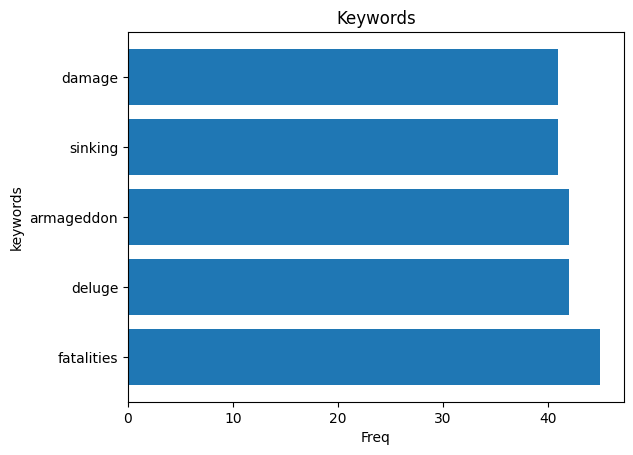

In [11]:
plt.barh(t_keywords.index,t_keywords.values)
plt.title("Keywords")
plt.xlabel("Freq")
plt.ylabel("keywords")

In [12]:
t_location = data_train['location'].value_counts().head(15)
t_location


location
Not found          2472
USA                 104
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Mumbai               22
Washington, DC       21
Kenya                20
Worldwide            19
Australia            18
Name: count, dtype: int64

In [13]:
tt_locations = data_train['location'].value_counts()[1:].head(15)
tt_locations

location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: count, dtype: int64

Text(0, 0.5, 'location')

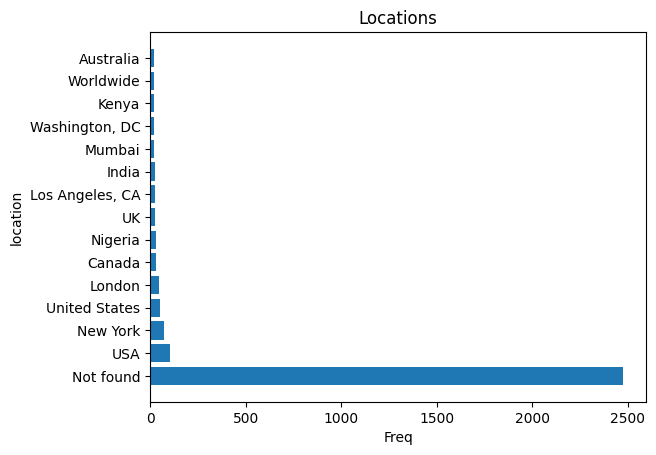

In [14]:
plt.barh(t_location.index,t_location.values)
plt.title("Locations")
plt.xlabel("Freq")
plt.ylabel("location")

Text(0, 0.5, 'location')

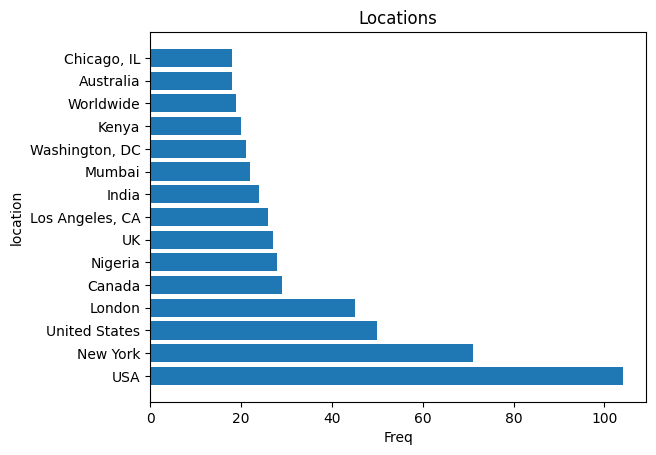

In [15]:
plt.barh(tt_locations.index,tt_locations.values)
plt.title("Locations")
plt.xlabel("Freq")
plt.ylabel("location")

<h1>Tokenization<h1>

In [16]:

stopwords_en = stopwords.words("english")
stopwords_en.remove('not')
ps = PorterStemmer()
#word_lemtize = WordNetLemmatizer()
#this function for clean data text

def wrangle(tweet):
    # Remove URLs
    cleaned_tweet = re.sub(r"http\S+|www\S+|https\S+", " ", tweet, flags=re.MULTILINE)
    # Remove punctations
    clean_ponutations = "".join([char for char in cleaned_tweet if char not in punct])
    # tokenize
    tokens = word_tokenize(clean_ponutations.lower())
    # Remove stopwords
    words = [word for word in tokens if word not in stopwords_en]
    # Stemming
    tweet = " ".join([ps.stem(word) for word in words ])
    #tweet = " ".join([word_lemtize.lemmatize(word) for word in words ])
    return tweet

In [17]:
data_train["cleaned_text"] = data_train["text"].apply(wrangle)
data_test["cleaned_text"] = data_test["text"].apply(wrangle)

<h1>vectorisation<h1>

In [18]:
data_train.head()

,keyword,location,text,target,cleaned_text
id,,,,,
48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesal market ablaz
49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,alway tri bring heavi metal rt
50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaz break newsnigeria flag set ablaz aba
52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cri set ablaz
53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plu side look sky last night ablaz


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [20]:
X = data_train["cleaned_text"].values
y = data_train["target"].values
X_t = data_test["cleaned_text"].values

In [21]:
data_test["id"]

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [22]:
countif = CountVectorizer()
X_c = countif.fit_transform(X)
X_t_c = countif.transform(X_t)
#we vectorise our sentence" 
tfid = TfidfVectorizer()
#we use the fit_transform method to convert the text into a matrix of token counts
X_f = tfid.fit_transform(X)
X_t_f = tfid.transform(X_t)

In [23]:
#split data

# Assuming X is your feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.3, random_state=42)
# Assuming X is your feature set and y is the target variable
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y, test_size=0.3, random_state=42)


In [24]:
#features_tfidf = pd.DataFrame(features_tf.toarray())
#features_tfidf.columns = tfid.get_feature_names_out()
#features_tfidf

#print(X_train)
#print("___________________________________________")
#print(X_test)

In [25]:
# Create an instance of Logistic Regression
#make dictionnary for know the accurcy of each model
dict_models = {}

Train Accuracy: 0.9718123344684071
Train precision 0.9747547523220732
Train recall 0.9430463576158941
[[3001   20]
 [ 129 2136]]
Test Accuracy: 0.8018534863195057
Test precision 0.8199281719861631
Test recall 0.8199281719861631
[[1209   93]
 [ 356  608]]
we use model svm
submission was saved


<Axes: >

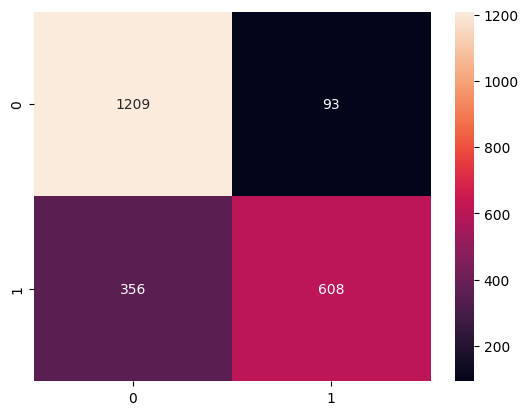

In [26]:
#we use tfidvectorise
model = svm.SVC()
# Fit the model using the training data
model.fit(X_train, y_train)
# Predict the labels of the train set
y_pred = model.predict(X_train)
# Print the accuracy of the model
print("Train Accuracy:", accuracy_score(y_train, y_pred))
print("Train precision",precision_score(y_train, y_pred, average='macro'))
print("Train recall",recall_score(y_train, y_pred))
print(confusion_matrix(y_train,y_pred))

# Predict the labels of the test set
y_pred_test = model.predict(X_test)
# Print the accuracy of the model test 
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test precision",precision_score(y_test, y_pred_test, average='macro'))
print("Test recall",precision_score(y_test, y_pred_test, average='macro'))
print(confusion_matrix(y_test,y_pred_test))

# make prediction for data test
predictions = model.predict(X_t_f)

# Export Prediction to Dataframe 
results = pd.DataFrame({ "id" : data_test["id"],'target': predictions})

# Save Submission to Output File For Submission
results.to_csv('submission.csv', index=False)
print("we use model svm")
dict_models["SVC"] = {}
dict_models["SVC"]["accuracy"] = accuracy_score(y_test, y_pred_test)
dict_models["SVC"]["precision"] = precision_score(y_test, y_pred_test, average='macro')
dict_models["SVC"]["recall"] = recall_score(y_test_c, y_pred_test)

print("submission was saved")
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True,fmt='d')

Train Accuracy: 0.9903518728717366
Train precision 0.9908605255135541
Train recall 0.9832229580573951
[[3008   13]
 [  38 2227]]
Test Accuracy: 0.7859664607237423
Test precision 0.7971548622769133
Test recall 0.6265560165975104
[[1177  125]
 [ 360  604]]
we use model random forest 
submission was saved


<Axes: >

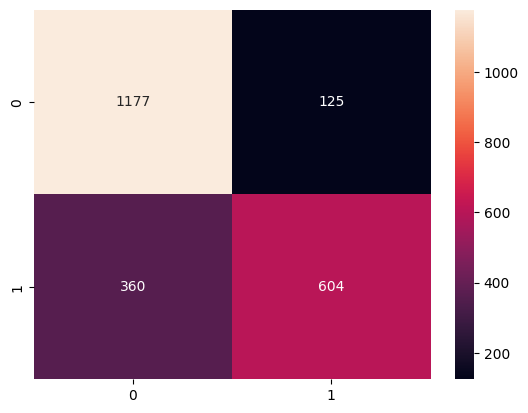

In [27]:
#we use TfidfVectorizer
model1 = RandomForestClassifier(n_jobs=-1)
# Fit the model using the training data
model1.fit(X_train, y_train)
# Predict the labels of the train set
y_pred = model1.predict(X_train)
# Print the accuracy of the model train
print("Train Accuracy:", accuracy_score(y_train, y_pred))
print("Train precision",precision_score(y_train, y_pred, average='macro'))
print("Train recall",recall_score(y_train, y_pred))
print(confusion_matrix(y_train,y_pred))
# Predict the labels of the test set
y_pred_test = model1.predict(X_test)
# Print the accuracy of the model test 
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test precision",precision_score(y_test, y_pred_test, average='macro'))
print("Test recall",recall_score(y_test, y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
# make prediction for data test
predictions = model1.predict(X_t_f)

# Export Prediction to Dataframe 
results = pd.DataFrame({ "id" : data_test["id"],'target': predictions})

# Save Submission to Output File For Submission
results.to_csv('submission.csv', index=False)
print("we use model random forest ")

print("submission was saved")
dict_models["Randomforest"] = {}
dict_models["Randomforest"]["accuracy"] = accuracy_score(y_test, y_pred_test)
dict_models["Randomforest"]["precision"] = precision_score(y_test, y_pred_test, average='macro')
dict_models["Randomforest"]["recall"] = recall_score(y_test_c, y_pred_test)

sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True,fmt='d')


Train Accuracy: 0.8912220961029134
Train precision 0.9062039684466477
Train recall 0.7818984547461368
[[2940   81]
 [ 494 1771]]
Test Accuracy: 0.8018534863195057
Test precision 0.8133036818138034
Test recall 0.6524896265560166
[[1188  114]
 [ 335  629]]
we use model logistic regression 
submission was saved


<Axes: >

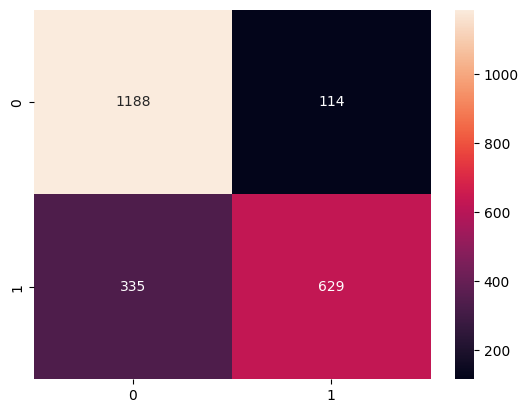

In [28]:
#we use TfidfVectorizer
model2 = LogisticRegression(max_iter=5000,random_state=4)
# Fit the model using the training data
model2.fit(X_train, y_train)
# Predict the labels of the train set
y_pred = model2.predict(X_train)
# Print the accuracy of the model train
print("Train Accuracy:", accuracy_score(y_train, y_pred))
print("Train precision",precision_score(y_train, y_pred, average='macro'))
print("Train recall",recall_score(y_train, y_pred))
print(confusion_matrix(y_train,y_pred))
# Predict the labels of the test set
y_pred_test = model2.predict(X_test)
# Print the accuracy of the model test 
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test precision",precision_score(y_test, y_pred_test, average='macro'))
print("Test recall",recall_score(y_test, y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
# make prediction for data test
predictions = model2.predict(X_t_f)

# Export Prediction to Dataframe 
results = pd.DataFrame({ "id" : data_test["id"],'target': predictions})

# Save Submission to Output File For Submission
results.to_csv('submission.csv', index=False)
print("we use model logistic regression ")

print("submission was saved")
dict_models["logisticregression"] = {}
dict_models["logisticregression"]["accuracy"] = accuracy_score(y_test, y_pred_test)
dict_models["logisticregression"]["precision"] = precision_score(y_test, y_pred_test, average='macro')
dict_models["logisticregression"]["recall"] = recall_score(y_test_c, y_pred_test)
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot = True,fmt='d')


Train Accuracy: 0.580779417328793
Train precision 0.7695899390298866
Train recall 0.022516556291390728
[[3019    2]
 [2214   51]]
Test Accuracy: 0.8071491615180936
Test precision 0.8178947571687254
Test recall 0.6639004149377593
[[1189  113]
 [ 324  640]]
we use model svm
submission was saved


<Axes: >

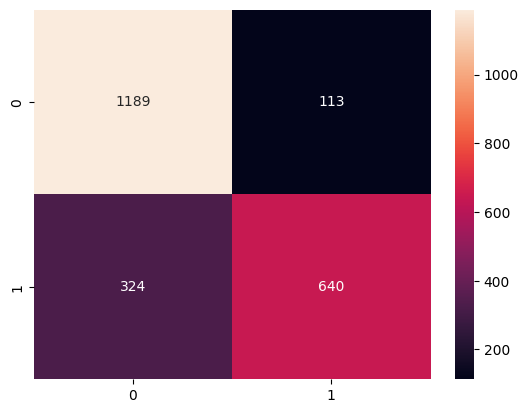

In [29]:
#we use countvectorize
model_c = svm.SVC()
# Fit the model using the training data
model_c.fit(X_train_c, y_train_c)
# Predict the labels of the train set
y_pred_c = model.predict(X_train_c)
# Print the accuracy of the model
print("Train Accuracy:", accuracy_score(y_train_c, y_pred_c))
print("Train precision",precision_score(y_train, y_pred_c, average='macro'))
print("Train recall",recall_score(y_train_c, y_pred_c))
print(confusion_matrix(y_train_c,y_pred_c))

# Predict the labels of the test set
y_pred_test_c = model_c.predict(X_test_c)
# Print the accuracy of the model test 
print("Test Accuracy:", accuracy_score(y_test_c, y_pred_test_c))
print("Test precision",precision_score(y_test_c, y_pred_test_c, average='macro'))
print("Test recall",recall_score(y_test_c, y_pred_test_c))
print(confusion_matrix(y_test_c,y_pred_test_c))

# make prediction for data test
predictions = model_c.predict(X_t_c)

# Export Prediction to Dataframe 
results = pd.DataFrame({ "id" : data_test["id"],'target': predictions})

# Save Submission to Output File For Submission
results.to_csv('submission.csv', index=False)
print("we use model svm")

print("submission was saved")
dict_models["SVC_count"] = {}
dict_models["SVC_count"]["accuracy"] = accuracy_score(y_test_c, y_pred_test_c)
dict_models["SVC_count"]["precision"] = precision_score(y_test_c, y_pred_test_c, average='macro')
dict_models["SVC_count"]["recall"] = recall_score(y_test_c, y_pred_test_c)
sns.heatmap(confusion_matrix(y_test_c,y_pred_test_c),annot = True,fmt='d')

Train Accuracy: 0.580779417328793
Train precision 0.7695899390298866
Train recall 0.022516556291390728
[[3019    2]
 [2214   51]]
Test Accuracy: 0.7837599293909974
Test precision 0.7931626580709149
Test recall 0.6296680497925311
[[1169  133]
 [ 357  607]]
we use model random forest 
submission was saved


<Axes: >

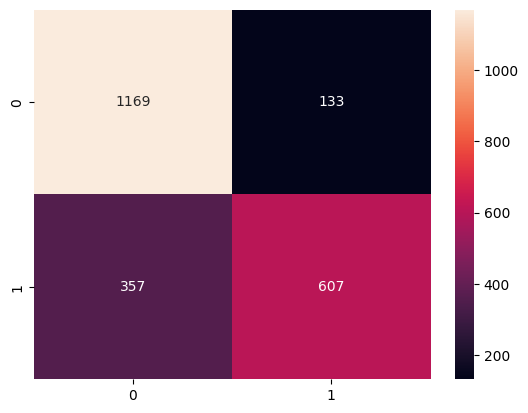

In [30]:
#we use countvectorize
model_c1 = RandomForestClassifier(n_jobs=-1)
# Fit the model using the training data
model_c1.fit(X_train_c, y_train_c)
# Predict the labels of the train set
y_pred_c = model.predict(X_train_c)
# Print the accuracy of the model
print("Train Accuracy:", accuracy_score(y_train_c, y_pred_c))
print("Train precision",precision_score(y_train, y_pred_c, average='macro'))
print("Train recall",recall_score(y_train_c, y_pred_c))
print(confusion_matrix(y_train_c,y_pred_c))

# Predict the labels of the test set
y_pred_test_c = model_c1.predict(X_test_c)
# Print the accuracy of the model test 
print("Test Accuracy:", accuracy_score(y_test_c, y_pred_test_c))
print("Test precision",precision_score(y_test_c, y_pred_test_c, average='macro'))
print("Test recall",recall_score(y_test_c, y_pred_test_c))
print(confusion_matrix(y_test,y_pred_test_c))

# make prediction for data test
predictions = model_c1.predict(X_t_c)

# Export Prediction to Dataframe 
results = pd.DataFrame({ "id" : data_test["id"],'target': predictions})

# Save Submission to Output File For Submission
results.to_csv('submission.csv', index=False)
print("we use model random forest ")

print("submission was saved")
dict_models["Randomforest_count"] = {}
dict_models["Randomforest_count"]["accuracy"] = accuracy_score(y_test_c, y_pred_test_c)
dict_models["Randomforest_count"]["precision"] = precision_score(y_test_c, y_pred_test_c, average='macro')
dict_models["Randomforest_count"]["recall"] = recall_score(y_test_c, y_pred_test_c)
sns.heatmap(confusion_matrix(y_test_c,y_pred_test_c),annot = True,fmt='d')

Train Accuracy: 0.9606507756337496
Train precision 0.9640496270096033
Train recall 0.9253863134657837
[[2982   39]
 [ 169 2096]]
Test Accuracy: 0.793468667255075
Test precision 0.7931281156530409
Test recall 0.6981327800829875
[[1125  177]
 [ 291  673]]
we use model logistic regression 
submission was saved


<Axes: >

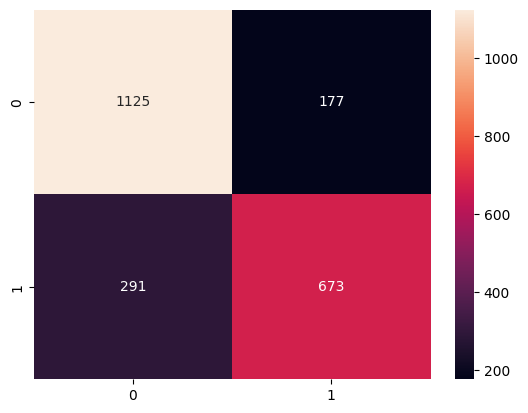

In [31]:
#we use countvectorize
model_c2 = LogisticRegression(max_iter=5000,random_state=4)
# Fit the model using the training data
model_c2.fit(X_train_c, y_train_c)
# Predict the labels of the train set
y_pred_c = model_c2.predict(X_train_c)
# Print the accuracy of the model
print("Train Accuracy:", accuracy_score(y_train_c, y_pred_c))
print("Train precision",precision_score(y_train, y_pred_c, average='macro'))
print("Train recall",recall_score(y_train_c, y_pred_c))
print(confusion_matrix(y_train_c,y_pred_c))

# Predict the labels of the test set
y_pred_test_c = model_c2.predict(X_test_c)
# Print the accuracy of the model test 
print("Test Accuracy:", accuracy_score(y_test_c, y_pred_test_c))
print("Test precision",precision_score(y_test_c, y_pred_test_c, average='macro'))
print("Test recall",recall_score(y_test_c, y_pred_test_c))
print(confusion_matrix(y_test,y_pred_test_c))

# make prediction for data test
predictions = model_c2.predict(X_t_c)

# Export Prediction to Dataframe 
results = pd.DataFrame({ "id" : data_test["id"],'target': predictions})

# Save Submission to Output File For Submission
results.to_csv('submission.csv', index=False)
print("we use model logistic regression ")

print("submission was saved")
dict_models["logisticregression_count"] = {}
dict_models["logisticregression_count"]["accuracy"] = accuracy_score(y_test_c, y_pred_test_c)
dict_models["logisticregression_count"]["precision"] = precision_score(y_test_c, y_pred_test_c, average='macro')
dict_models["logisticregression_count"]["recall"] = recall_score(y_test_c, y_pred_test_c)
sns.heatmap(confusion_matrix(y_test_c,y_pred_test_c),annot = True,fmt='d')

#we see the best model can use is SVC

In [32]:
#'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
parameters = {'max_depth':[2,10,20], 'n_estimators':[10,100,200,300]}
model_final = RandomForestClassifier()
clf = GridSearchCV(model_final,parameters,cv=5)
clf.fit(X_train,y_train)

print(clf.best_params_)
print(clf.best_score_)
sorted(clf.cv_results_.keys())

In [ ]:
dict_models

{'SVC': {'accuracy': 0.8018534863195057,
  'precision': 0.8199281719861631,
  'recall': 0.6307053941908713},
 'Randomforest': {'accuracy': 0.7833186231244483,
  'precision': 0.7896517789882997,
  'recall': 0.6421161825726142},
 'logisticregression': {'accuracy': 0.8018534863195057,
  'precision': 0.8199281719861631,
  'recall': 0.6307053941908713},
 'SVC_count': {'accuracy': 0.8018534863195057,
  'precision': 0.8199281719861631,
  'recall': 0.6639004149377593},
 'Randomforest_count': {'accuracy': 0.8018534863195057,
  'precision': 0.8199281719861631,
  'recall': 0.6421161825726142},
 'logisticregression_count': {'accuracy': 0.8018534863195057,
  'precision': 0.8199281719861631,
  'recall': 0.6981327800829875}}